In [ ]:
#Name-Mugdha Arvind
#Minor project

In [ ]:
#Problem statement: Create a classification model to predict whether price range of mobile based on certain specifications
#Target variable-Mobile price
#Features-
'''
• battery_power: Total energy a battery can store in one time measured in mAh
• blue: Has bluetooth or not
• clock_speed: speed at which microprocessor executes instructions
• dual_sim: Has dual sim support or not
• fc: Front Camera mega pixels
• four_g: Has 4G or not
• int_memory: Internal Memory in Gigabytes
• m_dep: Mobile Depth in cm
• mobile_wt: Weight of mobile phone
• n_cores: Number of cores of processor
• pc: Primary Camera mega pixels
• px_height: Pixel Resolution Height
• px_width: Pixel Resolution Width
• ram: Random Access Memory in Mega Bytes
• sc_h: Screen Height of mobile in cm
• sc_w: Screen Width of mobile in cm
• talk_time: longest time that a single battery charge will last when you are
• three_g: Has 3G or not
• touch_screen: Has touch screen or not
• wifi: Has wifi or not
• price_range: This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

'''

#Mobile_Price=function(features)
#y=f(x)

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('mobile_price_range_data.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
df.shape

(2000, 21)

## Handling null values(Data processing)

In [11]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
r1 = df['price_range'].value_counts()
r1

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

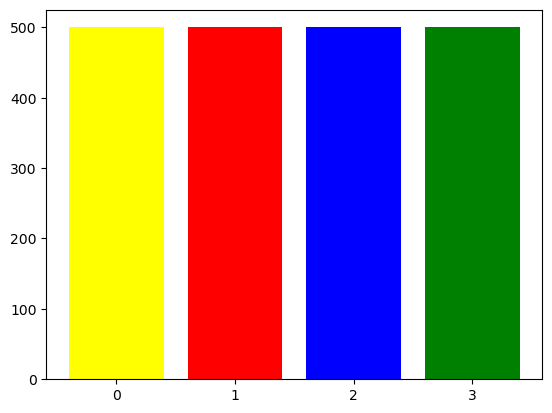

In [14]:
plt.bar(r1.index,r1.values,color=['red','blue','green','yellow'])
plt.xticks(r1.index)
plt.show()

In [15]:
x = df.drop('price_range',axis=1)
y = df['price_range']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(2000, 20)
(2000,)


## Split data into training and test data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1500, 20)
(500, 20)
(1500,)
(500,)


## Applying the following models on the training dataset         and generating the predicted value for the test                     dataset

### a) Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression 

In [19]:
lr1 = LogisticRegression()
lr1.fit(x_train,y_train)

C:\Users\Vishwas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
ypred_lr1 = lr1.predict(x_test)
print(ypred_lr1)

[0 2 0 3 1 2 3 0 3 3 0 1 2 3 3 2 2 2 1 0 0 1 0 2 1 1 3 3 3 0 1 0 3 0 2 3 2
 1 3 0 1 2 3 0 3 3 3 1 3 1 3 2 0 0 2 0 1 2 0 0 1 3 3 2 2 0 3 3 1 1 2 1 0 1
 2 0 0 3 2 1 3 2 1 0 1 3 3 3 3 0 3 3 3 0 3 2 2 3 2 1 0 1 0 0 1 3 3 0 0 1 0
 0 3 3 2 1 3 3 0 2 1 3 2 2 3 3 0 3 0 2 3 0 2 2 0 2 1 1 0 2 3 1 3 3 0 0 1 2
 1 2 3 1 1 0 2 3 0 1 0 1 3 3 1 2 1 0 0 2 1 3 3 1 0 0 3 1 1 2 0 1 0 0 0 1 3
 2 0 2 0 0 0 0 1 3 3 1 0 1 1 1 1 2 1 2 3 3 1 3 0 1 1 1 1 1 3 1 1 3 1 1 3 2
 3 0 0 3 0 2 0 0 1 0 2 3 2 1 0 2 3 1 3 3 2 3 0 3 2 2 2 3 3 1 1 3 2 1 2 3 3
 3 3 0 2 2 2 2 3 0 3 3 2 2 2 0 1 3 0 2 3 1 3 1 1 2 0 3 0 0 3 0 1 2 3 2 2 0
 1 0 0 3 3 0 1 1 2 0 3 3 3 3 1 3 2 0 3 2 3 2 0 0 1 3 1 3 1 1 2 0 3 3 2 0 2
 2 2 1 3 1 0 3 1 2 1 1 1 1 2 2 3 3 1 1 1 2 2 0 3 0 0 2 0 0 2 2 2 3 0 1 2 3
 3 3 2 3 1 2 0 2 1 3 3 0 1 3 1 3 2 3 1 0 3 2 0 0 3 3 1 2 3 2 0 3 0 2 2 2 0
 1 1 1 0 0 1 0 3 3 2 1 2 1 3 1 0 3 1 0 0 3 0 3 0 1 1 2 3 0 2 0 2 1 3 3 1 3
 1 2 1 0 3 2 0 2 2 2 2 2 1 1 2 3 1 0 3 1 1 1 3 3 3 2 0 2 2 0 1 2 3 1 2 0 0
 0 2 3 0 1 2 2 2 3 1 2 2 

In [21]:
from sklearn.metrics import confusion_matrix,classification_report

In [22]:
print(confusion_matrix(y_test,ypred_lr1))

print(classification_report(y_test,ypred_lr1))

[[95 36  1  0]
 [24 59 26  9]
 [ 1 23 59 37]
 [ 0  3 32 95]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       132
           1       0.49      0.50      0.49       118
           2       0.50      0.49      0.50       120
           3       0.67      0.73      0.70       130

    accuracy                           0.62       500
   macro avg       0.61      0.61      0.61       500
weighted avg       0.62      0.62      0.62       500



In [23]:
## ACCURACY
print('Train Score',lr1.score(x_train,y_train))

print('Test Score',lr1.score(x_test,y_test))

Train Score 0.6453333333333333
Test Score 0.616


### b) KNN Classification

In [24]:
from sklearn.neighbors import KNeighborsClassifier 

In [45]:
k1 = KNeighborsClassifier(n_neighbors=10)
k1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [46]:
ypred_k1 = k1.predict(x_test)
print(ypred_k1)

[0 2 1 3 1 1 2 0 3 1 0 0 2 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 2 2 0 2 2 2 1 3 1 3 1 0 0 0 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 0 3 2 1 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 2 1 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 2 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 1 2 2 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 2 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 0 2 2 2 1 3 0 1 3 2 2 2 1 0 1 0 3 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 2 2 3 1 0 1 0 1 2 3 0 3
 3 2 1 2 0 0 2 1 3 2 0 1 1 1 0 1 3 1 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2 1 2 1 3 1 2 0
 0 1 0 1 0 1 0 2 2 3 2 1 1 2 1 0 3 1 0 0 3 0 1 0 0 1 3 3 0 2 0 1 1 3 3 0 2
 0 2 0 0 3 3 0 2 2 1 3 1 2 0 1 3 1 0 3 1 0 0 3 2 3 2 0 2 1 0 1 2 3 2 1 1 0
 1 2 2 1 0 1 3 1 2 0 2 2 

C:\Users\Vishwas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [47]:
from sklearn.metrics import confusion_matrix,classification_report

In [48]:
print(confusion_matrix(y_test,ypred_k1))

print(classification_report(y_test,ypred_k1))

[[130   2   0   0]
 [  6 111   1   0]
 [  0  12 107   1]
 [  0   0   9 121]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       132
           1       0.89      0.94      0.91       118
           2       0.91      0.89      0.90       120
           3       0.99      0.93      0.96       130

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



In [29]:
## ACCURACY
print('Train Score',k1.score(x_train,y_train))

print('Test Score',k1.score(x_test,y_test))

Train Score 0.952
Test Score 0.938


C:\Users\Vishwas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Vishwas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

### c) SVM Classifier with linear and rbf kernel

In [35]:
from sklearn.svm import SVC

In [36]:
### Linear
s1 = SVC(kernel='linear' ,C=10)
s1.fit(x_train,y_train)

SVC(C=10, kernel='linear')

In [32]:
ypred_s1 = s1.predict(x_test)
print(ypred_s1)

[0 2 1 3 1 1 2 0 3 1 0 1 2 3 3 2 3 3 1 0 0 2 1 2 0 1 3 3 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 2 3 2 1 3 1 3 1 0 0 1 1 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 1 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 1 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 2 1 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 3 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 3 3 3 1 2 0 0 0 2 1 1 3 1 1 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 3 3 0 3 1 2 3 3 2 1 0 3 3 1 3 3 3
 3 3 0 1 2 2 1 3 0 2 3 2 2 2 1 0 1 0 2 3 1 3 1 1 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 3 3 3 1 0 1 0 1 2 3 0 3
 3 2 1 3 0 0 2 1 3 2 0 1 1 1 1 1 3 2 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 3
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2 1 3 0 3 1 2 0
 0 1 0 1 0 1 0 2 2 3 2 1 1 2 1 1 3 1 0 0 3 0 1 0 0 2 3 3 0 2 0 1 1 3 3 1 2
 0 2 0 0 3 3 0 2 2 2 3 1 2 0 1 3 1 0 3 1 0 0 3 2 3 2 0 2 1 0 1 2 3 2 1 1 0
 1 2 2 1 0 1 3 1 2 0 2 2 

In [33]:
print(confusion_matrix(y_test,ypred_s1))

print(classification_report(y_test,ypred_s1))

[[127   5   0   0]
 [  1 117   0   0]
 [  0   5 110   5]
 [  0   0   2 128]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       132
           1       0.92      0.99      0.96       118
           2       0.98      0.92      0.95       120
           3       0.96      0.98      0.97       130

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.97      0.96      0.96       500



In [34]:
## ACCURACY
print('Train Score',s1.score(x_train,y_train))

print('Test Score',s1.score(x_test,y_test))

Train Score 0.9833333333333333
Test Score 0.964


In [41]:
### rbf
s2 = SVC(kernel='rbf' ,C=10)
s2.fit(x_train,y_train)

SVC(C=10)

In [42]:
ypred_s2 = s2.predict(x_test)
print(ypred_s2)

[0 2 1 3 1 1 2 0 3 1 0 1 2 3 3 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 2 2 2 1 3 1 3 1 0 0 1 1 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 1 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 1 3 2 1 3 3 0 3 0 2 3 0 2 2 0 3 1 0 0 2 2 1 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 3 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 3 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 3 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 0 1 2 2 1 3 0 2 3 2 3 2 1 0 1 0 3 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 2 3 3 1 0 1 0 1 2 3 0 3
 3 2 1 3 0 0 2 1 3 2 0 1 1 1 1 1 3 2 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2 1 3 1 3 1 2 0
 0 1 0 1 0 1 0 2 2 3 2 1 1 2 1 1 3 1 0 0 3 0 1 0 0 1 3 3 0 2 0 1 1 3 3 1 2
 0 2 0 0 3 3 0 2 2 2 3 1 2 0 1 3 1 0 3 1 0 0 3 2 3 2 0 2 1 0 1 2 3 2 1 1 0
 1 2 2 1 1 1 3 1 2 0 2 2 

In [43]:
print(confusion_matrix(y_test,ypred_s2))

print(classification_report(y_test,ypred_s2))

[[127   5   0   0]
 [  0 118   0   0]
 [  0   7 107   6]
 [  0   0   4 126]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       132
           1       0.91      1.00      0.95       118
           2       0.96      0.89      0.93       120
           3       0.95      0.97      0.96       130

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [44]:
## ACCURACY
print('Train Score',s2.score(x_train,y_train))

print('Test Score',s2.score(x_test,y_test))

Train Score 0.966
Test Score 0.956


## Reporting the model with the best accuracy

1) Logistic Regression-
Train Score 0.6453333333333333
Test Score 0.616
                       
   
2) KNN Classification-
Train Score 0.952
Test Score 0.938
                       

3) SVM Classifier with linear and rbf kernel-
a) linear:Train Score 0.9833333333333333
          Test Score 0.964

b) rbf:Train Score 0.966
       Test Score 0.956
       
 

### Hence from the above results we can conclude that SVM Classifier with linear kernel gives the best accuracy.
